# Optimization

[Optimization with SciPy](https://scipy-lectures.org/advanced/mathematical_optimization/index.html)

In [90]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 14
%config InlineBackend.figure_format = 'retina'

# Curve Fitting

![SSE](images/line_residuals.png)

# Curve Fitting

![SSE](images/curve_residuals.gif)

# <font color=darkred>Example</font>

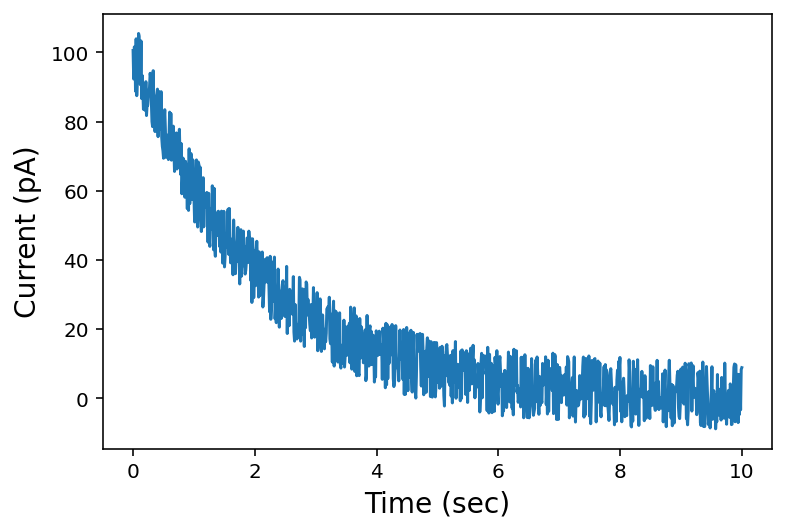

In [91]:
# Some simulated noisy data for an exponential decay.
time_sec = np.linspace(0, 10, 1000)
current_pA = 100 * np.exp(-time_sec / 2) + 20 * (np.random.rand(len(time_sec)) - 0.5)

plt.plot(time_sec, current_pA)
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)');

### A function that parameterizes the curve we wish to fit to the data in the form:

# y = $func$(x, param1, param2, ...)

In [93]:
def expDecay(time, amp, tau):
    return amp * np.exp(-time / tau)

### Optimize the input parameters to the exponential decay function in order to minimize the sum of sqaured errors between the fit and the data.

In [94]:
import scipy.optimize as opt

result = opt.curve_fit(expDecay, time_sec, current_pA)

print(result)

(array([99.38293202,  2.02831517]), array([[ 6.42961051e-01, -1.31554154e-02],
       [-1.31554154e-02,  5.39915754e-04]]))


In [95]:
# result[0] = optimized parameters
amp, tau = result[0]

amp, tau

(99.3829320166757, 2.028315169014395)

In [96]:
# result[1] = parameter covariance
cov = result[1]
var = np.diag(cov)
std = np.sqrt(var)

amp_std, tau_std = std

print(f"Amp = {amp :.1f} ± {amp_std :.2f}")
print(f"Tau = {tau :.1f} ± {tau_std :.2f} sec")

Amp = 99.4 ± 0.80
Tau = 2.0 ± 0.02 sec


### Plot data overlaid with fit.

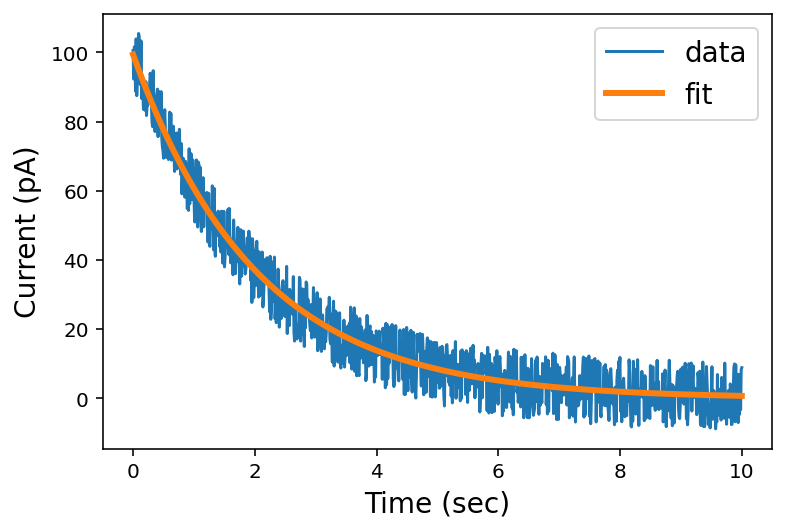

In [97]:
fit = expDecay(time_sec, amp, tau)

plt.plot(time_sec, current_pA, label='data')
plt.plot(time_sec, fit, lw=3, label='fit')
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)')
plt.legend();

# <font color=red>Example</font>

You measure the current given below in a patch clamp experiment. Fit the current to an exponential decay plus a constant and plot the data overlaid with the fit.

In [98]:
time_ms = np.linspace(0, 20, 101)
current_nA = np.array([147.46937849, 147.42375413, 142.02147882, 134.59475722,
       143.76883244, 147.23872468, 130.94185588, 143.2052489 ,
       144.71295827, 131.38573436, 129.17414776, 128.48831877,
       129.83241659, 130.69655667, 128.13752182, 136.30915918,
       117.66280624, 120.92314045, 127.97858328, 132.45921395,
       116.99777412, 121.37618892, 130.26427541, 127.26495741,
       121.64627623, 126.13329243, 119.58606364, 117.60093573,
       107.65291651, 111.99756806, 118.40607682, 110.16041496,
       110.64086131, 118.65777465, 120.8859308 , 118.32201201,
       121.70597173, 115.83238994, 105.24914494, 119.20050025,
       113.03770733, 115.1829795 , 117.88338289,  99.08773466,
       108.10985739, 105.04679939,  98.36870201, 100.22967854,
       107.49242972, 112.56538413, 114.38412576, 116.4176737 ,
       102.49365321, 107.41975191, 113.83440077,  97.77844284,
       113.63067635, 100.10407869, 114.47830806, 112.17332833,
       108.06710219, 106.85151462, 106.24019336, 109.0133804 ,
       113.03978215, 108.57405221, 105.48407685, 110.64058994,
       109.10749802, 107.22065268, 109.21979768, 112.46081133,
       100.25146941, 110.33553724, 102.92758238,  99.36036589,
       106.12664098, 100.80783136, 102.20445861,  98.98163444,
       100.23485151,  93.33503485,  93.21416839, 108.60617288,
        91.84970256,  99.96659992, 100.86829293,  91.7574689 ,
        93.43706872,  95.6826465 , 102.1778828 ,  94.7901413 ,
        96.32828518, 109.067598  , 109.58892608, 107.96995712,
       101.71608616,  93.21675403, 100.21974182, 104.86257934,
        94.59028764])

(-166044.7878374997, -81547.71066395858, 166178.36037512927)

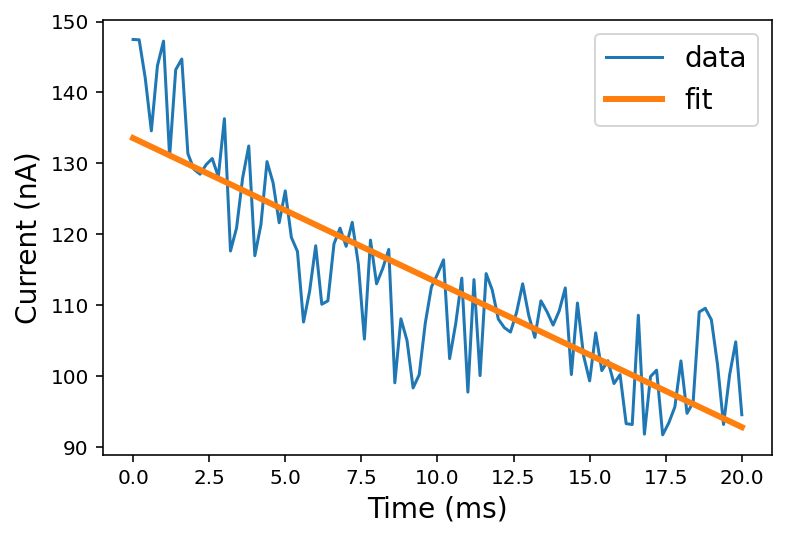

In [99]:
def expDecayPlusConstant(time, amp, tau, constant):
    return amp * np.exp(-time / tau) + constant

result = opt.curve_fit(expDecayPlusConstant, time_ms, current_nA)
amp, tau, constant = result[0]
fit = expDecayPlusConstant(time_ms, amp, tau, constant)

plt.plot(time_ms, current_nA, label='data')
plt.plot(time_ms, fit, lw=3, label='fit')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.legend();

amp, tau, constant

### Specifying parameter starting values and lower/upper bounds.

(48.385727428780434, 6.80134165448495, 97.52507947733778)

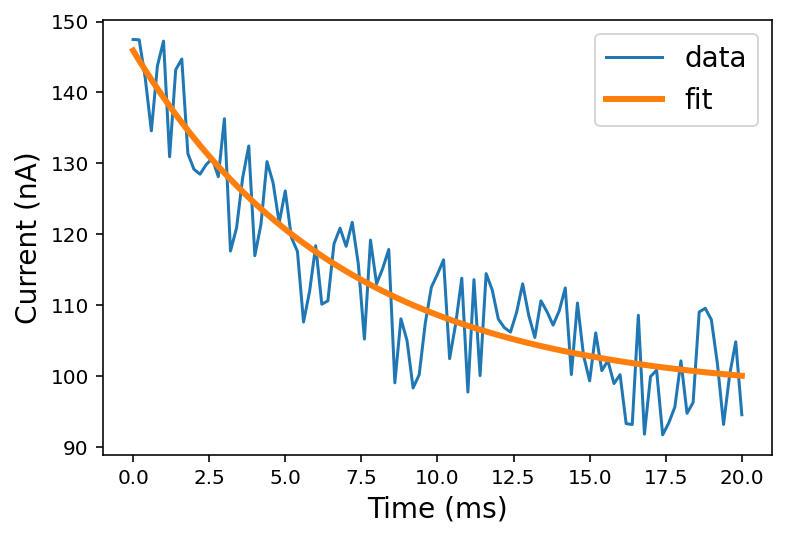

In [102]:
# amp, tau, constant
start = [50, 10, 100]
lowerbnds = (1, 0.01, 1)
upperbnds = (200, 200, 100)

result = opt.curve_fit(expDecayPlusConstant, time_ms, current_nA, p0=start, bounds=(lowerbnds, upperbnds))
amp, tau, constant = result[0]
fit = expDecayPlusConstant(time_ms, amp, tau, constant)

plt.plot(time_ms, current_nA, label='data')
plt.plot(time_ms, fit, lw=3, label='fit')
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.legend();

amp, tau, constant

---
# Gradient Descent

![Gradient Descent](images/gradient_descent.gif)

---
# Local vs. Global Minima

### Fits can be very sensitive to starting parameter values.

![Local vs Global Minima](images/local_vs_global_minima.png)

### Beware of fits that run into your bounds.

58.4483799577719 5.000000000000019


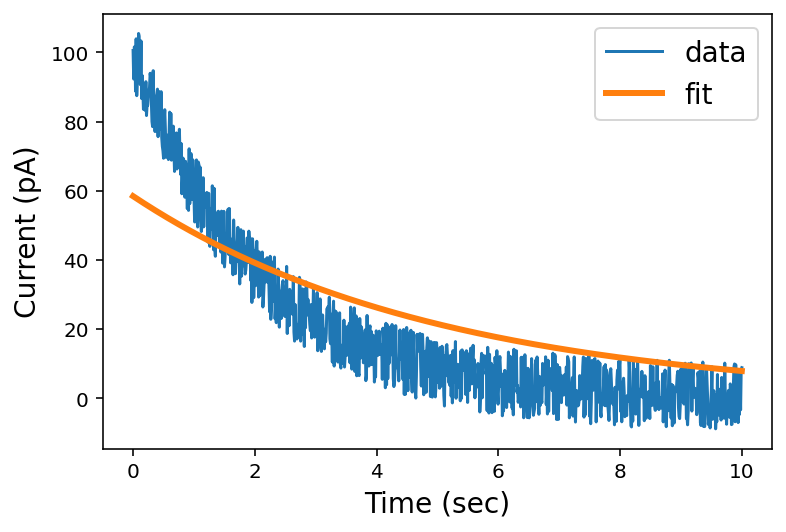

In [103]:
# amp, tau
start = [100, 8]
lowerbounds = [50, 5]
upperbounds = [150, 10]
result = opt.curve_fit(expDecay, time_sec, current_pA, p0=start, bounds=(lowerbounds, upperbounds))
amp, tau = result[0]
print(amp, tau)
fit = exponential_decay(time_sec, amp, tau)

plt.plot(time_sec, current_pA, label='data')
plt.plot(time_sec, fit, lw=3, label='fit')
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)')
plt.legend();

# <font color=red>Exercise</font>

Change the bounds for the previous fit to obtain a better fit to the data.

# Optimization


### Find optimal parameters that minimize an objective (or cost) function in the form:

# cost = $func$(array of params)

In [104]:
# cost function returning the sum of squared errors (SSE)
# between our data and an exponential decay with the input params
def sse(params):
    amp, tau = params
    fit = expDecay(time_sec, amp, tau)
    return ((current_pA - fit)**2).sum()

### Visualize the value returned by the above cost function for a range of amplitude and time constant values.

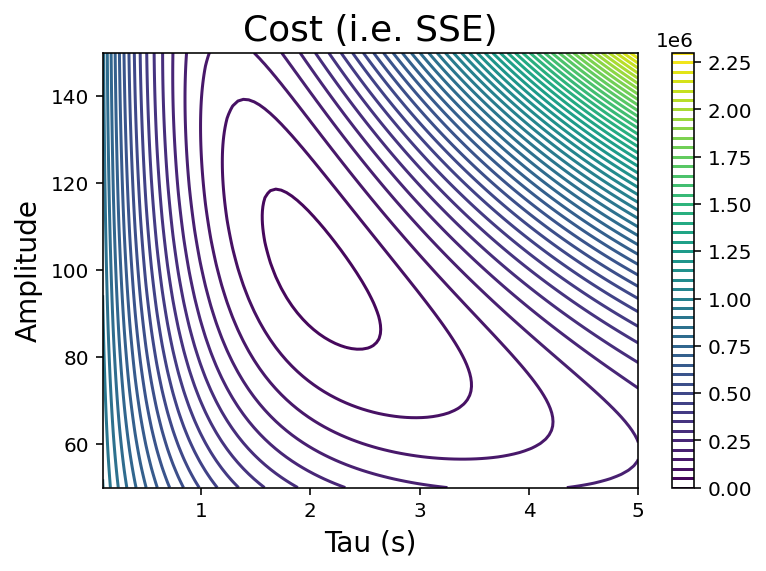

In [105]:
amps = np.linspace(50, 150, 100)
taus = np.linspace(0.1, 5, 100)

cost = np.zeros((100, 100))
for i, amp in enumerate(amps):
    for j, tau in enumerate(taus):
        cost[i,j] = sse([amp, tau])

plt.contour(taus, amps, cost, 50)
plt.xlabel('Tau (s)')
plt.ylabel('Amplitude')
plt.title('Cost (i.e. SSE)')
plt.colorbar();

### Find the parameters that minimize the cost function.

In [115]:
# initial guess for [amp, tau]
start = [200, 10]

# find parameters that minimize the cost function
result = opt.minimize(sse, start)

result

      fun: 32759.93676470202
 hess_inv: array([[ 8.44066388e-05, -1.98961096e-06],
       [-1.98961096e-06,  4.51988780e-06]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 144
      nit: 22
     njev: 48
   status: 0
  success: True
        x: array([99.38293237,  2.02831515])

In [116]:
# result.x = optimized parameters
amp, tau = result.x

print(amp, tau)

99.38293236916917 2.028315154918446


### !!! Pay attention to the result message.

In [117]:
# initial guess for [amp, tau]
start = [400, 10]

# find parameters that minimize the cost function
result = opt.minimize(sse, start)

result

      fun: 32759.936764702026
 hess_inv: array([[ 5.23868948e-10, -1.63709046e-11],
       [-1.63709046e-11,  3.34321682e-06]])
      jac: array([0.        , 0.00024414])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 183
      nit: 18
     njev: 58
   status: 2
  success: False
        x: array([99.38293147,  2.02831517])

In [118]:
result = opt.minimize(sse, start, options={'gtol': 1e-3})

result

      fun: 32759.936764702026
 hess_inv: array([[ 9.78308316e-03, -2.00625100e-04],
       [-2.00625100e-04,  8.23335933e-06]])
      jac: array([0.00024414, 0.00024414])
  message: 'Optimization terminated successfully.'
     nfev: 144
      nit: 17
     njev: 45
   status: 0
  success: True
        x: array([99.38293147,  2.02831517])

### !!! Make sure your result makes sense.

In [119]:
# method = sequential least square quadratic programming
result = opt.minimize(sse, start, method='slsqp')

result

     fun: 638246.43706222
     jac: array([1.9609375, 0.       ])
 message: 'Optimization terminated successfully'
    nfev: 107
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([ 2.00004804e+01, -3.75288148e+04])

### Parameter bounds.

*!!! Not all optimization methods allow for bounds.*

In [122]:
# amp, tau
start = [400, 10]
ampBnds = (1, 550)
tauBnds = (0.1, 20)

# find parameters that minimize the cost function
result = opt.minimize(sse, start, method='slsqp', bounds=(ampBnds, tauBnds))

result

     fun: 32759.936764708444
     jac: array([0.00146484, 0.01733398])
 message: 'Optimization terminated successfully'
    nfev: 44
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([99.38294278,  2.02831501])

In [50]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

# Constraints

![box](images/box.jpeg)

### You will need to cast all constraints in one of these two forms:

# $func$(params) = 0

# $func$(params) >= 0

For example, the volume constraint:

    width * width * height = 256

can be recast as:

    width * width * height - 256 = 0

In [123]:
# the cost function we want to minimize is the surface area of the box
def surfaceArea(params):
    width, height = params
    return width**2 + 4 * width * height

# our constraint that the box volume must be 256 cubic inches
# the constraint is satisfied when this function returns zero
def volumeConstraint(params):
    width, height = params
    return width**2 * height - 256

In [124]:
# width, height
start = [50, 2]
widthBnds = (1, 100)
heightBnds = (1, 100)
allBnds = (widthBnds, heightBnds)

# a dictionary that stores the constraint function and the constraint type (equality or inequality)
c1 = {'type': 'eq', 'fun': volumeConstraint}

result = opt.minimize(surfaceArea, start, method='slsqp', bounds=allBnds, constraints=c1)

result

     fun: 191.9999995550628
     jac: array([32.00000191, 32.        ])
 message: 'Optimization terminated successfully'
    nfev: 37
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([7.99999939, 4.00000059])

In [125]:
width, height = result.x

print(f"Box should be {width :.1f} x {width :.1f} x {height :.1f} inches.")

Box should be 8.0 x 8.0 x 4.0 inches.


### Let's also require that the box height is greater than or equal to the width.

Thus, the width vs. height constraint:

    height >= width

can be recast as:

    height - width >= 0

In [126]:
# our dimension constraint that the box height must greater than or equal to the width
# the constraint is satisfied when this function returns a value greater than or equal to zero
def dimensionConstraint(params):
    width, height = params
    return height - width

# a dictionary that stores the constraint function and the constraint type (equality or inequality)
c2 = {'type': 'ineq', 'fun': dimensionConstraint}

In [127]:
result = opt.minimize(surfaceArea, start, method='slsqp', bounds=allBnds, constraints=(c1, c2))

result

     fun: 201.58736798317975
     jac: array([38.09762383, 25.39841652])
 message: 'Optimization terminated successfully'
    nfev: 23
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([6.34960421, 6.34960421])

In [128]:
width, height = result.x

print(f"Box should be {width :.1f} x {width :.1f} x {height :.1f} inches.")

Box should be 6.3 x 6.3 x 6.3 inches.


# Global Minima

![Local vs Global Minima](images/local_vs_global_minima.png)

### There are a number of methods that attempt to find the global minima rather than the nearest local minima.

[e.g. basin hopping, brute force, annealing, SHG.](https://docs.scipy.org/doc/scipy/reference/optimize.html)

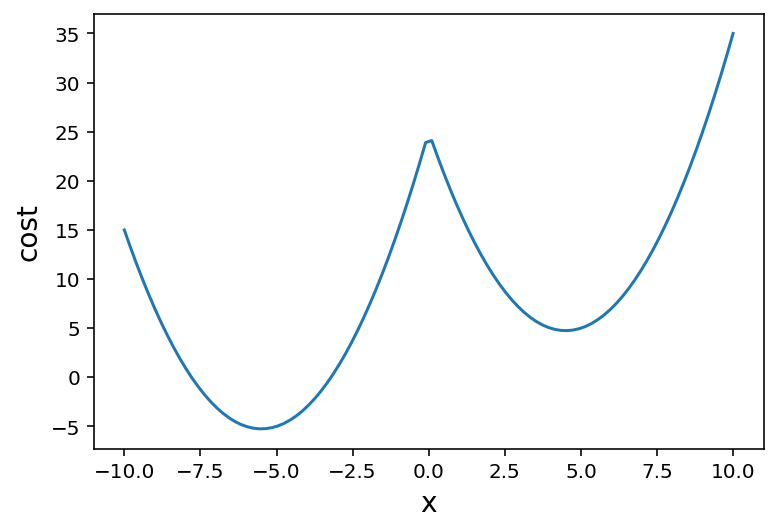

In [129]:
# cost function to be minimized
def cost(x):
    return (abs(x) - 5)**2 + x

# plot cost function
x = np.linspace(-10, 10, 100)
plt.plot(x, cost(x))
plt.xlabel('x')
plt.ylabel('cost');

### Optimize from the left.

In [130]:
result = opt.minimize(cost, -10)

result

      fun: -5.25
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([-5.50000002])

### Optimize from the right.

In [131]:
result = opt.minimize(cost, 10)

result

      fun: 4.750000000000001
 hess_inv: array([[0.5]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.50000003])

### Normally, we don't know the full cost function landscape.


### Here, we'll use simulated annealing to find the global minima in the range [-10, 10].

In [132]:
# find value global minimum within the range -10 to 10.
result = opt.dual_annealing(cost, bounds=[(-10, 10)])

result

     fun: array([-5.25])
 message: ['Maximum number of iteration reached']
    nfev: 2009
    nhev: 0
     nit: 1000
    njev: 4
  status: 0
 success: True
       x: array([-5.49999997])